## Датасет: [Tesla Insider Trading](https://www.kaggle.com/datasets/ilyaryabov/tesla-insider-trading).

### Описание датасета:
Датасет представляет собой выборку операций с ценными бумагами компании Tesla, совершённых инсайдерами, и является частью более крупного проекта "Insider Trading S&P500 – Inside Info". Данные охватывают транзакции с участием крупных акционеров и должностных лиц компании, включая такие операции, как покупка, продажа и опционы, начиная с 10 ноября 2021 года и до 27 июля 2022 года.

---

### Анализ сведений:
**Проблемная область:**
Проблемная область данного датасета касается анализа инсайдерских сделок в публичных компаниях, а также их влияния на ценообразование акций. Инсайдерские транзакции, совершаемые людьми с доступом к непубличной информации (такими как руководители, крупные акционеры или члены совета директоров), могут быть индикаторами будущих изменений стоимости акций. Исследование таких транзакций помогает понять, как информация внутри компании отражается в действиях ключевых участников, и может выявить паттерны поведения, которые влияют на рынки.

**Актуальность:**
Анализ инсайдерских сделок становится особенно важным в условиях высокой волатильности рынка и неопределенности. Инвесторы, аналитики и компании используют такие данные, чтобы лучше понимать сигналы от крупных акционеров и должностных лиц. Действия инсайдеров, такие как покупки и продажи акций, нередко рассматриваются как индикаторы доверия к компании, что может оказывать значительное влияние на рыночные ожидания и прогнозы.

**Объекты наблюдений:**
Объектами наблюдений в датасете являются инсайдеры компании Tesla — лица, имеющие значительное влияние на управление и информацию компании. Каждый объект характеризуется различными параметрами, включая должность, тип транзакции, количество акций и общую стоимость сделок.

**Атрибуты объектов:**
- Insider Trading: ФИО лица, совершившего транзакцию.
- Relationship: Должность или статус данного лица в компании Tesla.
- Date: Дата завершения транзакции.
- Transaction: Тип транзакции.
- Cost: Цена одной акции на момент совершения транзакции.
- Shares: Количество акций, участвующих в транзакции.
- Value ($): Общая стоимость транзакции в долларах США.
- Shares Total: Общее количество акций, принадлежащих этому лицу после завершения данной транзакции.
- SEC Form 4: Дата записи транзакции в форме SEC Form 4, обязательной для отчётности о сделках инсайдеров.

---

### Бизнес-цели:
1. **Для решения задачи регрессии:**
Цель: предсказать будущую стоимость акций компании Tesla на основе инсайдерских транзакций. Стоимость акций ("Cost") зависит от множества факторов, включая объём и тип транзакций, совершаемых инсайдерами. Если выявить зависимости между параметрами транзакций (количество акций, общий объём сделки, должность инсайдера) и стоимостью акций, это может помочь инвесторам принимать обоснованные решения о покупке или продаже.
2. **Для решения задачи классификации:**


### Выгрузка данных из файла в DataFrame:

In [316]:
from typing import Any, Tuple

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


df: DataFrame = pd.read_csv('..//static//csv//TSLA.csv')

### Краткая информация о DataFrame:

In [317]:
# Краткая информация о DataFrame
df.info()

# Статистическое описание числовых столбцов
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Insider Trading  156 non-null    object 
 1   Relationship     156 non-null    object 
 2   Date             156 non-null    object 
 3   Transaction      156 non-null    object 
 4   Cost             156 non-null    float64
 5   Shares           156 non-null    object 
 6   Value ($)        156 non-null    object 
 7   Shares Total     156 non-null    object 
 8   SEC Form 4       156 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.1+ KB


count        mean         std  min      25%      50%       75%      max
Cost  156.0  478.785641  448.922903  0.0  50.5225  240.225  934.1075  1171.04

### Предобработка данных:

In [318]:
# Преобразование типов данных
df['Insider Trading'] = df['Insider Trading'].astype('category')                             # Преобразование в категорию
df['Relationship'] = df['Relationship'].astype('category')                                   # Преобразование в категорию
df['Transaction'] = df['Transaction'].astype('category')                                     # Преобразование в категорию
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')                                      # Преобразование в float
df['Shares'] = pd.to_numeric(df['Shares'].str.replace(',', ''), errors='coerce')             # Преобразование в float с удалением запятых
df['Value ($)'] = pd.to_numeric(df['Value ($)'].str.replace(',', ''), errors='coerce')       # Преобразование в float с удалением запятых
df['Shares Total'] = pd.to_numeric(df['Shares Total'].str.replace(',', ''), errors='coerce') # Преобразование в float с удалением запятых

df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Преобразование в datetime
df['Year'] = df['Date'].dt.year   # Год
df['Month'] = df['Date'].dt.month # Месяц
df['Day'] = df['Date'].dt.day     # День
df: DataFrame = df.drop(columns=['Date', 'SEC Form 4'])  # Удаление столбцов с датами

print('Выборка данных:')
df.head(10)

Выборка данных:


Insider Trading                    Relationship      Transaction    Cost  \
0  Kirkhorn Zachary         Chief Financial Officer             Sale  196.72   
1    Taneja Vaibhav        Chief Accounting Officer             Sale  195.79   
2  Baglino Andrew D  SVP Powertrain and Energy Eng.             Sale  195.79   
3    Taneja Vaibhav        Chief Accounting Officer  Option Exercise    0.00   
4  Baglino Andrew D  SVP Powertrain and Energy Eng.  Option Exercise    0.00   
5  Kirkhorn Zachary         Chief Financial Officer  Option Exercise    0.00   
6  Baglino Andrew D  SVP Powertrain and Energy Eng.  Option Exercise   20.91   
7  Baglino Andrew D  SVP Powertrain and Energy Eng.             Sale  202.00   
8  Kirkhorn Zachary         Chief Financial Officer             Sale  193.00   
9  Baglino Andrew D  SVP Powertrain and Energy Eng.  Option Exercise   20.91   

   Shares  Value ($)  Shares Total  Year  Month  Day  
0   10455    2056775        203073  2022      3    6  
1    2466     482718        100458  2022      3    6  
2    1298     254232         65547  2022      3    6  
3    7138          0        102923  2022      3    5  
4    2586          0         66845  2022      3    5  
5   16867          0        213528  2022      3    5  
6   10500     219555         74759  2022      2   27  
7   10500    2121000         64259  2022      2   27  
8    3750     723750        196661  2022      2    6  
9   10500     219555         74759  2022      1   27

## Бизнес-цель №1 (Задача регрессии).

### Достижимый уровень качества модели:
**Основные метрики для регрессии:**
- **Средняя абсолютная ошибка (Mean Absolute Error, MAE)** – показывает среднее абсолютное отклонение между предсказанными и фактическими значениями.
Легко интерпретируется, особенно в финансовых данных, где каждая ошибка в долларах имеет значение.
- **Среднеквадратичная ошибка (Mean Squared Error, MSE)** – показывает, насколько отклоняются прогнозы модели от истинных значений в квадрате. Подходит для оценки общего качества модели.
- **Коэффициент детерминации (R²)** – указывает, какую долю дисперсии зависимой переменной объясняет модель. R² варьируется от 0 до 1 (чем ближе к 1, тем лучше).

---

### Выбор ориентира:
В качестве базовой модели для оценки качества предсказаний выбрано использование среднего значения целевой переменной (Cost) на обучающей выборке. Это простой и интуитивно понятный метод, который служит минимальным ориентиром для сравнения с более сложными моделями. Базовая модель помогает установить начальный уровень ошибок (MAE, MSE) и показатель качества (R²), которые сложные модели должны улучшить, чтобы оправдать своё использование.

---

### Разбиение данных:

In [319]:
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разбить данные на обучающую и тестовую выборки
def split_into_train_test(
    df_input: DataFrame,
    stratify_colname: str = "y",  
    frac_train: float = 0.8,
    random_state: int = 42,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    X: DataFrame = df_input  # Contains all columns.
    y: DataFrame = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and test dataframes.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test


# Определяем целевой признак и входные признаки
y_feature: str = 'Cost'
X_features: list[str] = df.drop(columns=y_feature, axis=1).columns.tolist()

# Разбиваем данные на обучающую и тестовую выборки
X_df_train, X_df_test, y_df_train, y_df_test = split_into_train_test(
    df, 
    stratify_colname=y_feature,  
    frac_train=0.8, 
    random_state=42 
)

# Вычисляем предсказания базовой модели (среднее значение целевой переменной)
baseline_predictions: list[float] = [y_df_train.mean()] * len(y_df_test) # type: ignore

# Оцениваем базовую модель
print('Baseline MAE:', mean_absolute_error(y_df_test, baseline_predictions))
print('Baseline MSE:', mean_squared_error(y_df_test, baseline_predictions))
print('Baseline R²:', r2_score(y_df_test, baseline_predictions))

Baseline MAE: 417.78235887096776
Baseline MSE: 182476.07973024843
Baseline R²: -0.027074997920953914


### Выбор моделей обучения:

Для обучения были выбраны следующие модели:
1. **Случайный лес (Random Forest)**: Ансамблевая модель, которая использует множество решающих деревьев. Она хорошо справляется с нелинейными зависимостями и шумом в данных, а также обладает устойчивостью к переобучению.
2. **Линейная регрессия (Linear Regression)**: Простая модель, предполагающая линейную зависимость между признаками и целевой переменной. Она быстро обучается и предоставляет легкую интерпретацию результатов.
3. **Градиентный бустинг (Gradient Boosting)**: Мощная модель, создающая ансамбль деревьев, которые корректируют ошибки предыдущих. Эта модель эффективна для сложных наборов данных и обеспечивает высокую точность предсказаний.

---

### Построение конвейера:

In [320]:
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Числовые столбцы
num_columns: list[str] = [
    column
    for column in df.columns
    if df[column].dtype not in ("category", "object")
]

# Категориальные столбцы
cat_columns: list[str] = [
    column
    for column in df.columns
    if df[column].dtype in ("category", "object")
]

# Заполнение пропущенных значений
num_imputer = SimpleImputer(strategy="median")
# Стандартизация
num_scaler = StandardScaler()
# Конвейер для обработки числовых данных
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Заполнение пропущенных значений
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
# Унитарное кодирование
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
# Конвейер для обработки категориальных данных
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Трансформер для предобработки признаков
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

# Основной конвейер предобработки данных
pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
    ]
)

### Демонстрация работы конвейера:

In [321]:
# Применение конвейера
preprocessing_result = pipeline_end.fit_transform(X_df_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df.head(10)

Cost    Shares  Value ($)  Shares Total      Year     Month       Day  \
0 -0.966516 -0.361759  -0.450022     -0.343599  0.715678 -0.506108 -0.400623   
1 -1.074894  1.225216  -0.414725     -0.319938 -1.397276  0.801338  0.906673   
2 -1.074894  1.211753  -0.415027     -0.320141 -1.397276  1.062828 -0.098939   
3  1.167142  0.037499   1.023612     -0.325853 -1.397276  1.062828 -0.501184   
4  1.217886 -0.075287   0.632973     -0.330205 -1.397276  1.062828 -0.501184   
5  0.505872 -0.361021  -0.443679     -0.343698  0.715678 -0.767598  1.308918   
6 -1.088674 -0.357532  -0.450389     -0.342863  0.715678  0.278360 -0.903429   
7 -0.692146 -0.355855  -0.445383     -0.343220  0.715678  0.801338  1.409480   
8 -1.088674 -0.361181  -0.450389     -0.343649 -1.397276  1.062828 -0.903429   
9  1.091997 -0.204531   0.114712      1.538166  0.715678 -1.029087  1.208357   

   Insider Trading_DENHOLM ROBYN M  Insider Trading_Kirkhorn Zachary  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   
5                              0.0                               0.0   
6                              0.0                               0.0   
7                              0.0                               0.0   
8                              0.0                               0.0   
9                              0.0                               0.0   

   Insider Trading_Musk Elon  Insider Trading_Musk Kimbal  \
0                        0.0                          0.0   
1                        1.0                          0.0   
2                        1.0                          0.0   
3                        1.0                          0.0   
4                        1.0                          0.0   
5                        0.0                          0.0   
6                        0.0                          0.0   
7                        0.0                          0.0   
8                        0.0                          0.0   
9                        1.0                          0.0   

   Insider Trading_Taneja Vaibhav  Insider Trading_Wilson-Thompson Kathleen  \
0                             1.0                                       0.0   
1                             0.0                                       0.0   
2                             0.0                                       0.0   
3                             0.0                                       0.0   
4                             0.0                                       0.0   
5                             0.0                                       0.0   
6                             1.0                                       0.0   
7                             0.0                                       0.0   
8                             1.0                                       0.0   
9                             0.0                                       0.0   

   Relationship_Chief Accounting Officer  \
0                                    1.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
6                                    1.0   
7                                    0.0   
8                                    1.0   
9                                    0.0   

   Relationship_Chief Financial Officer  Relationship_Director  \
0                                   0.0                    0.0   
1                                   0.0                    0.0   
2                                   0.0                    0.0   
3                                   0.0   

### Обучение моделей:

Оценка результатов обучения:
1. **Случайный лес (Random Forest)**:
    - Показатели:
        - Средний балл: 0.9993.
        - Стандартное отклонение: 0.00046.
    - Вывод: Очень высокая точность, что свидетельствует о хорошей способности модели к обобщению. Низкое значение стандартного отклонения указывает на стабильность модели.
2. **Линейная регрессия (Linear Regression)**:
    - Показатели:
        - Средний балл: 1.0.
        - Стандартное отклонение: 0.0.
    - Вывод: Идеальная точность, однако есть вероятность переобучения, так как стандартное отклонение равно 0. Это может указывать на то, что модель идеально подгоняет данные, но может не работать на новых данных.
3. **Градиентный бустинг (Gradient Boosting)**:
    - Показатели:
        - Средний балл: 0.9998.
        - Стандартное отклонение: 0.00014.
    - Вывод: Отличные результаты с высокой точностью и низкой вариабельностью. Модель также демонстрирует хорошую устойчивость.

In [322]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Обучить модели
def train_models(X: DataFrame, y: DataFrame, 
                 models: dict[str, Any]) -> dict[str, Any]:
    results: dict[str, Any] = {}
    for model_name, model in models.items():
        # Создаем конвейер для каждой модели
        model_pipeline = Pipeline(
            [
                ("features_preprocessing", features_preprocessing),
                ("model", model) # Используем текущую модель
            ]
        )
        
        # Обучаем модель и вычисляем кросс-валидацию
        scores = cross_val_score(model_pipeline, X, y, cv=5) # 5-кратная кросс-валидация
        results[model_name] = {
            "mean_score": scores.mean(),
            "std_dev": scores.std()
        }
    
    return results


models_regression: dict[str, Any] = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

results: dict[str, Any] = train_models(X_df_train, y_df_train, models_regression)

# Вывод результатов
for model_name, scores in results.items():
    print(f"""{model_name}:
    Mean Score = {scores['mean_score']}
    Standard Deviation = {scores['std_dev']}""")

d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarni

Random Forest:
    Mean Score = 0.9992841344976828
    Standard Deviation = 0.0004515288830049682
Linear Regression:
    Mean Score = 1.0
    Standard Deviation = 0.0
Gradient Boosting:
    Mean Score = 0.9997688048426001
    Standard Deviation = 0.0001416815109781245


d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


### Проверка на тестовом наборе данных:

Оценка результатов обучения:
1. Случайный лес (Random Forest):
    - Показатели:
        - MAE (обучение): 1.858
        - MAE (тест): 4.489
        - MSE (обучение): 10.959
        - MSE (тест): 62.649
        - R2 (обучение): 0.9999
        - R2 (тест): 0.9997
        - STD (обучение): 3.310
        - STD (тест): 7.757
    - Вывод: Случайный лес показывает великолепные значения R2 на обучающей и тестовой выборках, что свидетельствует о сильной способности к обобщению. Однако MAE и MSE на тестовой выборке значительно выше, чем на обучающей, что может указывать на некоторые проблемы с переобучением.
2. Линейная регрессия (Linear Regression):
    - Показатели:
        - MAE (обучение): 3.069e-13
        - MAE (тест): 2.762e-13
        - MSE (обучение): 1.437e-25
        - MSE (тест): 1.196e-25
        - R2 (обучение): 1.0
        - R2 (тест): 1.0
        - STD (обучение): 3.730e-13
        - STD (тест): 3.444e-13
    - Вывод: Высокие показатели точности и нулевые ошибки (MAE, MSE) указывают на то, что модель идеально подгоняет данные как на обучающей, так и на тестовой выборках. Однако это также может быть признаком переобучения.
3. Градиентный бустинг (Gradient Boosting):
    - Показатели:
        - MAE (обучение): 0.156
        - MAE (тест): 3.027
        - MSE (обучение): 0.075
        - MSE (тест): 41.360
        - R2 (обучение): 0.9999996
        - R2 (тест): 0.9998
        - STD (обучение): 0.274
        - STD (тест): 6.399
    - Вывод: Градиентный бустинг демонстрирует отличные результаты на обучающей выборке, однако MAE и MSE на тестовой выборке довольно высокие, что может указывать на определенное переобучение или необходимость улучшения настройки модели.

In [ ]:
import numpy as np

from sklearn import metrics


# Оценка качества различных моделей на основе метрик
def evaluate_models(models: dict[str, Any], 
                    pipeline_end: Pipeline, 
                    X_train: DataFrame, y_train, 
                    X_test: DataFrame, y_test) -> dict[str, dict[str, Any]]:
    results: dict[str, dict[str, Any]] = {}
    
    for model_name, model in models.items():
        # Создание пайплайна для текущей модели
        model_pipeline = Pipeline(
            [
                ("pipeline", pipeline_end), 
                ("model", model),
            ]
        )
        
        # Обучение текущей модели
        model_pipeline.fit(X_train, y_train)

        # Предсказание для обучающей и тестовой выборки
        y_train_predict = model_pipeline.predict(X_train)
        y_test_predict = model_pipeline.predict(X_test)

        # Вычисление метрик для текущей модели
        metrics_dict: dict[str, Any] = {
            "MAE_train": metrics.mean_absolute_error(y_train, y_train_predict),
            "MAE_test": metrics.mean_absolute_error(y_test, y_test_predict),
            "MSE_train": metrics.mean_squared_error(y_train, y_train_predict),
            "MSE_test": metrics.mean_squared_error(y_test, y_test_predict),
            "R2_train": metrics.r2_score(y_train, y_train_predict),
            "R2_test": metrics.r2_score(y_test, y_test_predict),
            "STD_train": np.std(y_train - y_train_predict),
            "STD_test": np.std(y_test - y_test_predict),
        }

        # Сохранение результатов
        results[model_name] = metrics_dict
    
    return results


y_train = np.ravel(y_df_train)  
y_test = np.ravel(y_df_test) 

result: dict[str, dict[str, Any]] = evaluate_models(models_regression,
                                                    pipeline_end,
                                                    X_df_train, y_train,
                                                    X_df_test, y_test)

# Вывод результатов
for model_name, metrics_dict in result.items():
    print(f"Модель: {model_name}")
    for metric_name, value in metrics_dict.items():
        print(f"\t{metric_name}: {value}")
    print()

Модель: Random Forest
	MAE_train: 1.8584435483870716
	MAE_test: 4.489381249999976
	MSE_train: 10.958770153225622
	MSE_test: 62.643889510626195
	R2_train: 0.9999465631134502
	R2_test: 0.9996474059899577
	STD_train: 3.3095436106742198
	STD_test: 7.757028236410516

Модель: Linear Regression
	MAE_train: 3.0690862038154006e-13
	MAE_test: 2.761679773755077e-13
	MSE_train: 1.4370485712253764e-25
	MSE_test: 1.19585889812782e-25
	R2_train: 1.0
	R2_test: 1.0
	STD_train: 3.7295840825107354e-13
	STD_test: 3.4438670391637766e-13

Модель: Gradient Boosting
	MAE_train: 0.15613772760448064
	MAE_test: 3.027282706028462
	MSE_train: 0.07499640211231481
	MSE_test: 41.36034726227861
	R2_train: 0.9999996343043813
	R2_test: 0.9997672013852927
	STD_train: 0.2738547098596532
	STD_test: 6.3988297145358555



### Подбор гиперпараметров:

In [324]:
from sklearn.model_selection import GridSearchCV


# Применение конвейера к данным
X_train_processing_result = pipeline_end.fit_transform(X_df_train)
X_test_processing_result = pipeline_end.transform(X_df_test)

# Создание и настройка модели случайного леса
model = RandomForestRegressor()

# Установка параметров для поиска по сетке
param_grid: dict[str, list[int | None]] = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30], # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разбиения узла
}

# Подбор гиперпараметров с помощью поиска по сетке
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
grid_search.fit(X_train_processing_result, y_train)

# Результаты подбора гиперпараметров
print("Лучшие параметры:", grid_search.best_params_)
# Меняем знак, так как берем отрицательное значение среднеквадратичной ошибки
print("Лучший результат (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Лучший результат (MSE): 188.5929593664171


### Сравнение наборов гиперпараметров:

Результаты анализа показывают, что параметры из старой сетки обеспечивают значительно лучшее качество модели. Среднеквадратическая ошибка (MSE) на кросс-валидации для старых параметров составила 179.369, что существенно ниже, чем для новых параметров (1290.656). На тестовой выборке модель с новыми параметрами показала MSE 172.574, что сопоставимо с результатами модели со старыми параметрами, однако этот результат является случайным, так как новые параметры продемонстрировали плохую кросс-валидационную ошибку, указывая на недообучение. Таким образом, параметры из старой сетки более предпочтительны, так как они обеспечивают лучшее обобщение и меньшую ошибку.

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Старые параметры: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 50}
Лучший результат (MSE) на старых параметрах: 179.369172166932

Новые параметры: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Лучший результат (MSE) на новых параметрах: 1290.6561132979532
Среднеквадратическая ошибка (MSE) на тестовых данных: 172.57398236522087
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 13.136741695154885


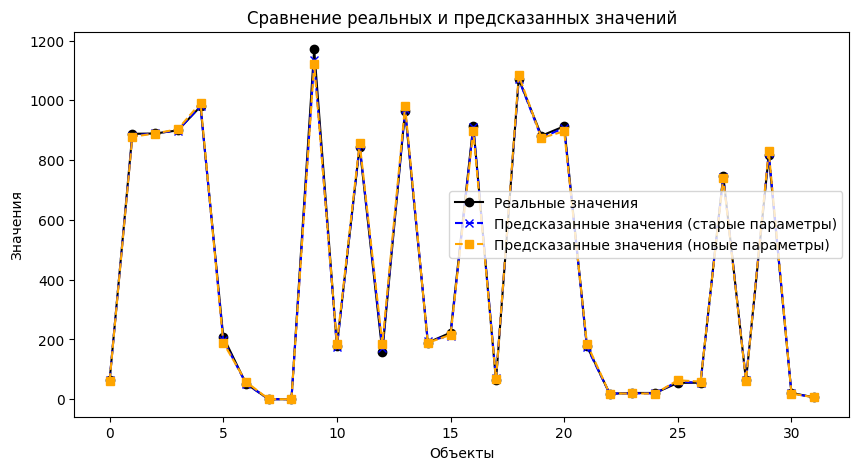

In [ ]:
# Установка параметров для поиска по сетке для старых значений
old_param_grid: dict[str, list[int | None]] = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30], # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разбиения узла
}

# Подбор гиперпараметров с помощью поиска по сетке для старых параметров
old_grid_search = GridSearchCV(estimator=model, 
                                param_grid=old_param_grid,
                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
old_grid_search.fit(X_train_processing_result, y_train)

# Результаты подбора для старых параметров
old_best_params = old_grid_search.best_params_
# Меняем знак, так как берем отрицательное значение MSE
old_best_mse = -old_grid_search.best_score_


# Установка параметров для поиска по сетке для новых значений
new_param_grid: dict[str, list[int]] = {
    'n_estimators': [50],
    'max_depth': [5],
    'min_samples_split': [10]
}

# Подбор гиперпараметров с помощью поиска по сетке для новых параметров
new_grid_search = GridSearchCV(estimator=model, 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

# Обучение модели на тренировочных данных
new_grid_search.fit(X_train_processing_result, y_train)

# Результаты подбора для новых параметров
new_best_params = new_grid_search.best_params_
# Меняем знак, так как берем отрицательное значение MSE
new_best_mse = -new_grid_search.best_score_


# Обучение модели с лучшими параметрами для новых значений
model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train_processing_result, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_best.predict(X_test_processing_result)

# Оценка производительности модели
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Вывод результатов
print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

# Обучение модели с лучшими параметрами для старых значений
model_old = RandomForestRegressor(**old_best_params)
model_old.fit(X_train_processing_result, y_train)

# Прогнозирование на тестовой выборке для старых параметров
y_pred_old = model_old.predict(X_test_processing_result)

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Реальные значения', marker='o', linestyle='-', color='black')
plt.plot(y_pred_old, label='Предсказанные значения (старые параметры)', marker='x', linestyle='--', color='blue')
plt.plot(y_pred, label='Предсказанные значения (новые параметры)', marker='s', linestyle='--', color='orange')
plt.xlabel('Объекты')
plt.ylabel('Значения')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()